In [2]:
try:
  %tensorflow_version 2.x
except:
  pass
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow_hub as hub

TensorFlow 2.x selected.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/color.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import os

In [0]:
classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']

In [0]:
import glob
import shutil

In [0]:
project_path='/content/color'
for cl in classes:
  images = glob.glob('/content/color'+'/'+cl+'/*.JPG')
  print("{}: {} Images".format(cl, len(images)))
  train, val,test = images[:round(len(images)*0.7)], images[round(len(images)*0.78):round(len(images)*0.98)],images[round(len(images)*0.98):]
  
  for t in train:
    if not os.path.exists(os.path.join(project_path, 'train', cl)):
      os.makedirs(os.path.join(project_path, 'train', cl))
    shutil.move(t, os.path.join(project_path, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(project_path, 'val', cl)):
      os.makedirs(os.path.join(project_path, 'val', cl))
    shutil.move(v, os.path.join(project_path, 'val', cl))
  for t in test:
    if not os.path.exists(os.path.join(project_path, 'test', cl)):
      os.makedirs(os.path.join(project_path, 'test', cl))
    shutil.move(t, os.path.join(project_path, 'test', cl))

Apple___Apple_scab: 630 Images
Apple___Black_rot: 621 Images
Apple___Cedar_apple_rust: 275 Images
Apple___healthy: 1645 Images
Blueberry___healthy: 1502 Images
Cherry_(including_sour)___Powdery_mildew: 1052 Images
Cherry_(including_sour)___healthy: 854 Images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 446 Images
Corn_(maize)___Common_rust_: 1192 Images
Corn_(maize)___Northern_Leaf_Blight: 870 Images
Corn_(maize)___healthy: 21 Images
Grape___Black_rot: 1180 Images
Grape___Esca_(Black_Measles): 1383 Images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 Images
Grape___healthy: 423 Images
Orange___Haunglongbing_(Citrus_greening): 5507 Images
Peach___Bacterial_spot: 2297 Images
Peach___healthy: 360 Images
Pepper,_bell___Bacterial_spot: 997 Images
Pepper,_bell___healthy: 1476 Images
Potato___Early_blight: 1000 Images
Potato___Late_blight: 1000 Images
Potato___healthy: 152 Images
Raspberry___healthy: 371 Images
Soybean___healthy: 5090 Images
Squash___Powdery_mildew: 1813 Images
Str

In [0]:

BATCH_SIZE=32

In [0]:
IMAGE_SHAPE = 224
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))
feature_extractor.trainable=False


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/train',
        shuffle=True,
        target_size=(224,224),
        class_mode='binary')

Found 36961 images belonging to 38 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/val',
        shuffle=False,
        target_size=(224,224),
        class_mode='binary')

Found 10563 images belonging to 38 classes.


In [0]:
model=tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(38,activation='softmax')
])

In [0]:
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [0]:
EPOCHS=20
history=model.fit_generator(
                   train_data_gen,
                   epochs=EPOCHS,
                   validation_data=val_data_gen)

Epoch 1/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.1536 - accuracy: 0.9553 - val_loss: 0.1729 - val_accuracy: 0.9462
Epoch 2/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.1113 - accuracy: 0.9668 - val_loss: 0.1437 - val_accuracy: 0.9564
Epoch 3/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.0859 - accuracy: 0.9746 - val_loss: 0.1346 - val_accuracy: 0.9577
Epoch 4/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1307 - val_accuracy: 0.9591
Epoch 5/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.0580 - accuracy: 0.9839 - val_loss: 0.1268 - val_accuracy: 0.9593
Epoch 6/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.0491 - accuracy: 0.9862 - val_loss: 0.1283 - val_accuracy: 0.9586
Epoch 7/20
1156/1156 [==============================] - 281s 243ms/step - loss: 0.0428 - accuracy: 0.9886 - val_

In [0]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [0]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

9069848

In [0]:
RPS_SAVED_MODEL = "rps_saved_model"

In [0]:
tf.saved_model.save(model, RPS_SAVED_MODEL)

In [0]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['keras_layer_2_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_keras_layer_2_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 38)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [0]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [0]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'keras_layer_2_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_layer_2_input')})
{'dense_2': TensorSpec(shape=(None, 38), dtype=tf.float32, name='dense_2')}


In [0]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]


tflite_model = converter.convert()
with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)

In [0]:
from google.colab import files
files.download('')

In [0]:
!zip -r /content/file.zip /content/color/test

  adding: content/color/test/ (stored 0%)
  adding: content/color/test/Apple___Cedar_apple_rust/ (stored 0%)
  adding: content/color/test/Apple___Cedar_apple_rust/23f6e0fa-3860-48a5-a3f4-4e64b54a3046___FREC_C.Rust 4336.JPG (deflated 2%)
  adding: content/color/test/Apple___Cedar_apple_rust/5cc20b25-edc1-4ec9-afc8-c19a5ef1cfda___FREC_C.Rust 3540.JPG (deflated 2%)
  adding: content/color/test/Apple___Cedar_apple_rust/04da297e-5238-41b1-a8a0-0c87c6c2f21f___FREC_C.Rust 4394.JPG (deflated 2%)
  adding: content/color/test/Apple___Cedar_apple_rust/f416a057-5518-4df4-8c12-660cd636166c___FREC_C.Rust 4412.JPG (deflated 2%)
  adding: content/color/test/Apple___Cedar_apple_rust/4e469367-da28-4b4b-a06e-18d64f0433bc___FREC_C.Rust 4014.JPG (deflated 2%)
  adding: content/color/test/Soybean___healthy/ (stored 0%)
  adding: content/color/test/Soybean___healthy/25cb3356-598d-4253-8eb8-3f6aa8ded46c___RS_HL 6210.JPG (deflated 2%)
  adding: content/color/test/Soybean___healthy/c34f7a6d-7a03-4f44-b9e0-c1bdb

In [21]:
interpreter = tf.lite.Interpreter(model_content='/content/sample_data/converted_model (1).tflite')

interpreter.allocate_tensors()

ValueError: ignored

In [0]:
interpreter = tf.lite.Interpreter(model_path="/content/sample_data/converted_model (1).tflite")
interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
interpreter.allocate_tensors()


In [26]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("== Input details ==")
print("shape:", input_details[0]['shape'])
print("\n== Output details ==")
print("shape:", output_details[0]['shape'])

== Input details ==
shape: [ 32 224 224   3]

== Output details ==
shape: [32 38]


In [0]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [0]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
def load_image(img_path,show=True):
  img = image.load_img(img_path, target_size=(224, 224))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255  
  if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

  return img_tensor

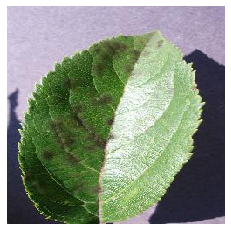

In [16]:
img_path='/content/sample_data/6b66d8dd-af9f-43b5-a43f-6e4c6d64bede___FREC_Scab 3248.JPG'
new_image=load_image(img_path)

In [0]:
interpreter.set_tensor(input_index,new_image)

In [20]:
interpreter.invoke()

RuntimeError: ignored

In [19]:
interpreter.get_tensor(output_index)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
predictions = []
test_labels = []
test_images = []

for img, label in test_batches.take(50):
  interpreter.set_tensor(input_index, img)
  interpreter.invoke()
  predictions.append(interpreter.get_tensor(output_index))
  test_labels.append(label[0])
  test_images.append(np.array(img))

In [7]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
